## Implementation of a simple MAB with Thompson sampling
#### TODO: Add a simple UCB implementationB

In [1]:
from numpy import random
import pandas as pd
from scipy.stats import beta


In [2]:
from models.agent import Agent      
from models.bandit import Bandit

In [3]:
class Experiment:
    def __init__(self, bandits, n_simulation, n_rounds, thompson_samples):
        self.bandits = bandits
        self.n_simulation = n_simulation
        self.n_rounds = n_rounds
        self.thompson_samples = thompson_samples

    def start(self):
        self.record = pd.DataFrame(index= range(self.n_rounds), columns= [bandit.name for bandit in self.bandits]).fillna(0)
        for i in range(self.n_simulation):
            data = {bandit.name:{'bandit':bandit, 'data':(1,1)} for bandit in self.bandits}
            this_record = pd.DataFrame(index= range(self.n_rounds), columns= [bandit.name for bandit in self.bandits]).fillna(0)
            agent = Agent(data)
            for r in range(self.n_rounds):
                winner = agent.choose_bandit(self.thompson_samples)    
                bandit = data[winner]['bandit']
                a = bandit.pull()
                b = 1 - a
                data[winner]['data'] = data[winner]['data'][0]+a, data[winner]['data'][1]+b
                this_record.loc[r, winner] += 1
#             print('i is', i)
#             print('r is', r)
#             print('record is', self.record)
#             break
            self.record += this_record

        
        
    def percentage(self, plot=False):
        out = self.record.div(self.record.sum(axis=1), axis=0)
        if plot:
            out = out.plot()
        return out



In [4]:
# Test out MAB at high probability bandit
bandits_high = [
Bandit(0.59,'bandit1'),
Bandit(0.13,'bandit2'),
Bandit(0.6,'bandit3'),
Bandit(0.25,'bandit4'),
Bandit(0.35,'bandit5'),
Bandit(0.23,'bandit6')]


thompson_samples_1 = Experiment(bandits_high, n_simulation=100, n_rounds=1000, thompson_samples=1)
thompson_samples_10 = Experiment(bandits_high, n_simulation=100, n_rounds=1000, thompson_samples=10)


thompson_samples_50 = Experiment(bandits_high, n_simulation=100, n_rounds=1000, thompson_samples=50)


bandit initialized
bandit initialized
bandit initialized
bandit initialized
bandit initialized
bandit initialized


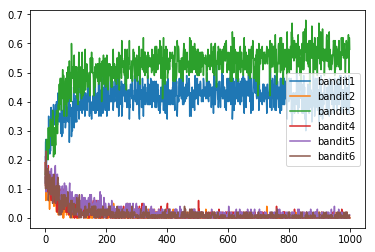

In [7]:
# Test using different sample size for Thompson Sampling
thompson_samples_1.start()
thompson_samples_1.percentage(plot=True)



In [6]:
# Test using different sample size for Thompson Sampling
thompson_samples_10.start()
thompson_samples_10.percentage(plot=True)


bandit initialized


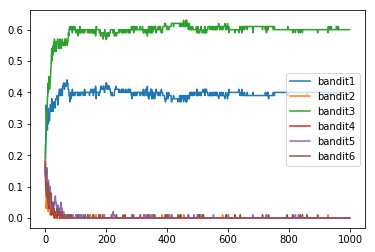

In [8]:
thompson_samples_50.start()
thompson_samples_50.percentage(plot=True)

In [ ]:
# TODO: Testing small samples, and changing probabilities to simulate real life scenarios


